# Analyzing BVB's xG Performance Under Favre

Comparing how xG performance has changed over time in the Bundesliga, looking to explain how Favre's BVB play, and what has changed this season to make them defensively more stable and offensively less prolific.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [7]:
buli_comp = {
    "teams": pd.Series(
        ["Bayern Munich", "Borussia Dortmund", "Borussia Monchengladbach", "RB Leipzig"]
    ),
    "shots": pd.Series([618, 445, 482, 552]),
    "not_scored": pd.Series([518, 361, 416, 471]),
    "blocked": pd.Series([130, 100, 124, 125]),
    "missed": pd.Series([224, 151, 150, 205]),
    "saved": pd.Series([152, 106, 128, 133]),
    "post": pd.Series([12, 4, 14, 8]),
    "goals": pd.Series([100, 84, 66, 81]),
}

df = pd.DataFrame(buli_comp).sort_values("shots", ascending=False)
df

,teams,shots,not_scored,blocked,missed,saved,post,goals
0,Bayern Munich,618,518,130,224,152,12,100
3,RB Leipzig,552,471,125,205,133,8,81
2,Borussia Monchengladbach,482,416,124,150,128,14,66
1,Borussia Dortmund,445,361,100,151,106,4,84


In [8]:
df_melt = pd.melt(df, id_vars="teams")
df_melt

,teams,variable,value
0,Bayern Munich,shots,618
1,RB Leipzig,shots,552
2,Borussia Monchengladbach,shots,482
3,Borussia Dortmund,shots,445
4,Bayern Munich,not_scored,518
5,RB Leipzig,not_scored,471
6,Borussia Monchengladbach,not_scored,416
7,Borussia Dortmund,not_scored,361
8,Bayern Munich,blocked,130
9,RB Leipzig,blocked,125


In [9]:
matplotlib.rcParams["font.sans-serif"] = "Roboto Condensed"
matplotlib.rcParams["font.family"] = "sans-serif"


## Comparing Total Shots

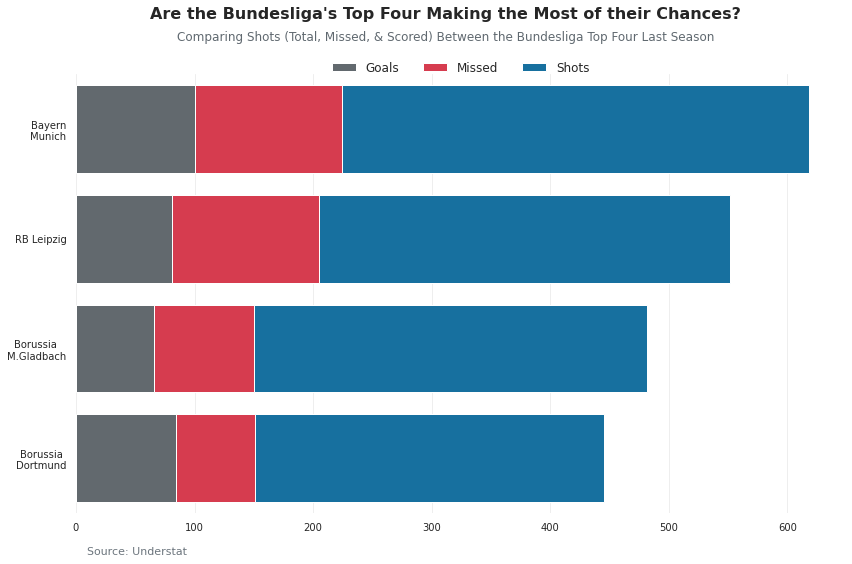

In [21]:
# Initialize the matplotlib figure
f, ax = plt.subplots(tight_layout=True, figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Plot Each Variable (Total Shots, Missed Shots, Total Goals)
bar1 = sns.barplot(data=df, x="shots", y="teams", label="Shots", color="#0077b6")

bar2 = sns.barplot(data=df, x="missed", y="teams", label="Missed", color="#ef233c")

bar3 = sns.barplot(data=df, x="goals", y="teams", label="Goals", color="#606970")

# Legend
current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))
ax.legend(
    reversed_handles,
    reversed_labels,
    ncol=3,
    loc="upper center",
    frameon=False,
    fontsize=12,
    borderaxespad=-1.5,
)

# Axes Labels & Ticks
ax.set(ylabel="", xlabel="")
ax.tick_params(axis="both", which="major", labelsize=10)
ax.set_yticklabels(
    ["Bayern\nMunich", "RB Leipzig", "Borussia   \nM.Gladbach", "Borussia \nDortmund"]
)
ax.set_axisbelow(True)

# Grids & Spines
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, color="#EEEEEE")
ax.yaxis.grid(False)

# Headers & Captions
ax.text(
    x=0.48,
    y=1.12,
    s="Are the Bundesliga's Top Four Making the Most of their Chances?",
    fontsize=16,
    weight="bold",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)
ax.text(
    x=0.48,
    y=1.07,
    s="Comparing Shots (Total, Missed, & Scored) Between the Bundesliga Top Four Last Season",
    fontsize=12,
    color="#606970",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)
ax.text(
    x=0.08,
    y=-0.1,
    s="Source: Understat",
    fontsize=11,
    color="#6c757d",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)

# Save Figure
plt.savefig("buli-shots.png")


## Comparing Shots Not Scored

In [12]:
df = pd.DataFrame(buli_comp).sort_values("not_scored", ascending=False)
df

,teams,shots,not_scored,blocked,missed,saved,post,goals
0,Bayern Munich,618,518,130,224,152,12,100
3,RB Leipzig,552,471,125,205,133,8,81
2,Borussia Monchengladbach,482,416,124,150,128,14,66
1,Borussia Dortmund,445,361,100,151,106,4,84


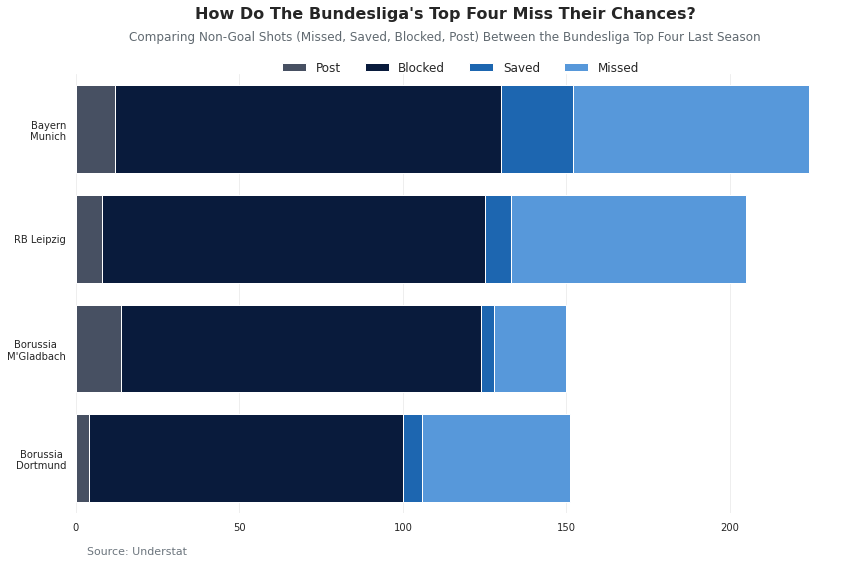

In [20]:
# Initialize the matplotlib figure
f, ax = plt.subplots(tight_layout=True, figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Plot Each Variable (Blocked, Missed, Saved, Post)
bar1 = sns.barplot(data=df, x="missed", y="teams", label="Missed", color="#4198F0")

bar2 = sns.barplot(data=df, x="saved", y="teams", label="Saved", color="#0466C8")

bar3 = sns.barplot(data=df, x="blocked", y="teams", label="Blocked", color="#001845")

bar4 = sns.barplot(data=df, x="post", y="teams", label="Post", color="#434F66")

# Legend
current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))
ax.legend(
    reversed_handles,
    reversed_labels,
    ncol=4,
    loc="upper center",
    frameon=False,
    fontsize=12,
    borderaxespad=-1.5,
)

# Axes Labels & Ticks
ax.set(ylabel="", xlabel="")
ax.tick_params(axis="both", which="major", labelsize=10)
ax.set_yticklabels(
    ["Bayern\nMunich", "RB Leipzig", "Borussia   \nM'Gladbach", "Borussia \nDortmund"]
)
ax.set_axisbelow(True)

# Grids & Spines
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, color="#EEEEEE")
ax.yaxis.grid(False)

# Headers & Captions
ax.text(
    x=0.48,
    y=1.12,
    s="How Do The Bundesliga's Top Four Miss Their Chances?",
    fontsize=16,
    weight="bold",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)
ax.text(
    x=0.48,
    y=1.07,
    s="Comparing Non-Goal Shots (Missed, Saved, Blocked, Post) Between the Bundesliga Top Four Last Season",
    fontsize=12,
    color="#606970",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)
ax.text(
    x=0.08,
    y=-0.1,
    s="Source: Understat",
    fontsize=11,
    color="#6c757d",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)

# Save Figure
plt.savefig("buli-missed.png")
